For our kaggle competition 
 1.Make Jupyter notebook with exploratory data analysis (different plots and histograms)
 2.Generate as much features as you can 
 3.Select 3 different algorithms 
     1. For each algorithm select features and hyperparameters with cross validation (save your cross-validation metrics)
     2. For selected hyperparameters train algorithm on whole train dataset 
     3. Make prediction on test dataset and submit on Kaggle
     4. Write you Kaggle score. Compare it with you cross-validation scores. 
     5. Try to explain, what features make the biggest impact on result (feature importance)
 4.What algorithm does show the best score?
 5.Load you notebook to git (make your own repository)

You can show us your drafts before deadline and we will send corrections to you.

Code Requirements:
1) Accuracy
2) Сomments in code
3) Description of everything you do in the markdown cells of jupyter

## HW1 Kuznetsova Veronika

In [117]:
#Imoprt all necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
%matplotlib inline

In [246]:
#Read data
train = pd.read_csv('Downloads/mlbio1/train.csv')
test = pd.read_csv('Downloads/mlbio1/test.csv')
sample = pd.read_csv('Downloads/mlbio1/sample_submission.csv')

In [67]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## 1.Exploratory data analysis

In [68]:
train_quant = df_train.filter (['age', 'avg_glucose_level', 'bmi'], axis = 1)

In [69]:
train_quant.head()

,age,avg_glucose_level,bmi
0,3.0,95.12,18.0
1,58.0,87.96,39.2
2,8.0,110.89,17.6
3,70.0,69.04,35.9
4,14.0,161.28,19.1


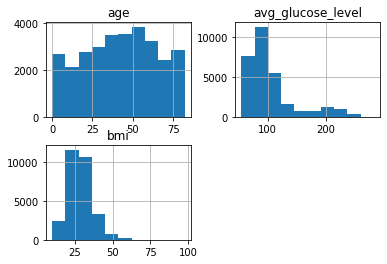

In [260]:
#We have categorical and quantative features. So, on quantative we can observe distribution on histograms.
train_quant.hist();

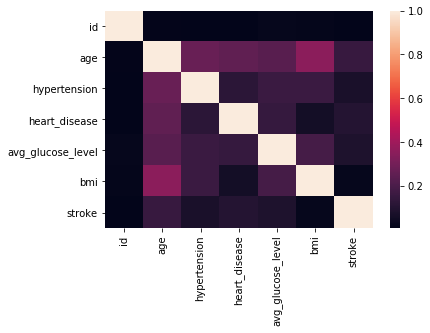

In [74]:
#Here we can se the correlations between features
sns.heatmap(train.corr());

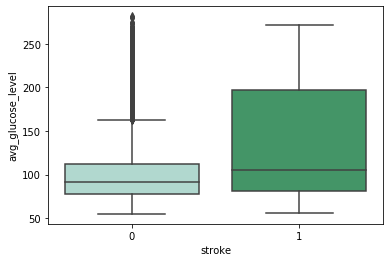

In [258]:
#Here we can see that people with stroke have higher aglevel of glucose.   
sns.boxplot(x='stroke', y='avg_glucose_level', data=train, palette = 'BuGn');

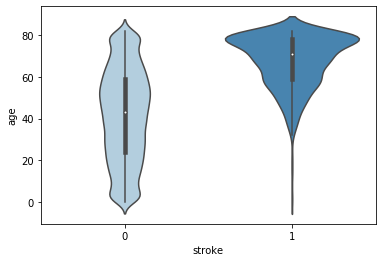

In [256]:
#Here we can see that according to age increase the amount of people with stroke is higher.
sns.violinplot(x='stroke', y='age', data=train, palette= 'Blues');

## 2.Algorithms

In [263]:
#Work with data
mean_bmi_tr = train['bmi'].mean()
train['bmi'] = train['bmi'].fillna(mean_bmi_tr)
mean_bmi_te = train['bmi'].mean()
test['bmi'] = test['bmi'].fillna(mean_bmi_te)

In [264]:
ever_married_dict = {'Yes': 1, 'No':0 }
train['ever_married'] =train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

In [265]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,0,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,0,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,0,Never_worked,Rural,161.28,19.1,NaN,0


In [266]:
#According to the features analysis above we can create a list of features
features_list = ['age', 'bmi', 'heart_disease', 'hypertension', 'avg_glucose_level']

## 2.1 The first

In [267]:
clf = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l1')
clf.fit(train[features_list], train['stroke'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [269]:
prediction_clf = clf.predict_proba(test[features_list])[:,1]

In [270]:
clf.predict_proba(test[features_list])

array([[1.00000000e+00, 7.84155796e-52],
       [1.00000000e+00, 8.94230767e-31],
       [1.00000000e+00, 5.16178332e-32],
       ...,
       [1.00000000e+00, 3.94330395e-10],
       [1.00000000e+00, 7.94741075e-39],
       [1.00000000e+00, 8.16342231e-13]])

In [272]:
scores = my_cross_validation_for_roc_auc(clf, train[features_list] , train['stroke'])

In [273]:
scores

[0.8380021838171618,
 0.8216453871188101,
 0.8263580129290876,
 0.83723029420187,
 0.8384688815152391]

Kaggle_scores: 0.86588

It is wonderfull that Kaggle showed better result.

## 2.2 The second

In [275]:
lgb = LGBMClassifier(n_estimators=50, max_depth=5)
lgb.fit(train[features_list], train['stroke'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [276]:
prediction_lgb = lgb.predict_proba(test[features_list])[:,1]

In [277]:
lgb.predict_proba(test[features_list])

array([[9.99881085e-01, 1.18915299e-04],
       [9.92267381e-01, 7.73261888e-03],
       [9.82690656e-01, 1.73093440e-02],
       ...,
       [9.24532735e-01, 7.54672647e-02],
       [9.97728459e-01, 2.27154144e-03],
       [9.12804065e-01, 8.71959351e-02]])

In [278]:
scores = my_cross_validation_for_roc_auc(lgb, train[features_list] , train['stroke'])

In [279]:
scores

[0.8482375431714639,
 0.8551491358662905,
 0.8482340715334237,
 0.8506393256888158,
 0.8401210685978898]

Kaggle_scores: 0.86226

## 2.3 The third

In [242]:
rfc = RandomForestClassifier(n_estimators= 1000, n_jobs=10)
rfc.fit(train[features_list], train['stroke'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [280]:
prediction_rfc = rfc.predict_proba(test[features_list])[:,1]

In [274]:
rfc.predict_proba(test[features_list])

array([[1.   , 0.   ],
       [0.997, 0.003],
       [1.   , 0.   ],
       ...,
       [0.886, 0.114],
       [1.   , 0.   ],
       [0.927, 0.073]])

In [281]:
scores = my_cross_validation_for_roc_auc(rfc, train[features_list] , train['stroke'])

In [282]:
scores

[0.8132476921023176,
 0.7879217655618757,
 0.7887519760614273,
 0.7867330408883467,
 0.8022752757852095]

Kaggle_scores: 0.79368

## Function

In [100]:
def my_cross_validation_for_roc_auc(clf, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        prediction_on_this_fold = clf.predict_proba(X_test)[:,1]
        
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
        
    return scores

## Which features?

I could not understand which features make the biggest impact. I have tried to find correlations betwwen them and target (stroke) and only between themselves. But could not establish any logic.

## The best score?

LGBMClassifier gave the best score as in my own practice as on Kaggle. 